<a href="https://colab.research.google.com/github/sovan2006/Machine-Learning-Projects/blob/main/Stock_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf


In [19]:
import yfinance as yf

data = yf.download("AAPL", start="2015-01-01", end="2025-01-01")
data.head()


/tmp/ipython-input-4048732813.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
2015-01-05,23.577574,24.110150,23.391173,24.030263,257142000
2015-01-06,23.579788,23.839418,23.218079,23.641922,263188400
2015-01-07,23.910431,24.010288,23.677428,23.788382,160423600
2015-01-08,24.829124,24.886821,24.121242,24.238854,237458000


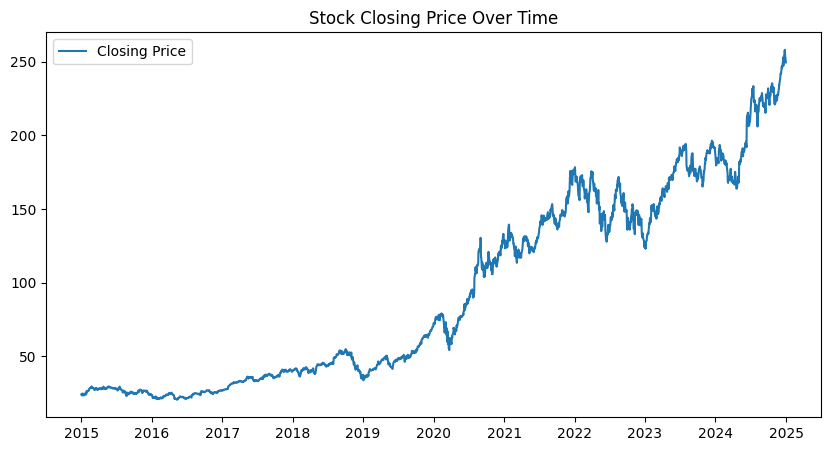

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Closing Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.show()


In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [22]:
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len]

x_train = []
y_train = []


In [23]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (1952, 60, 1)
y_train shape: (1952,)


In [25]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0188
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 3.0112e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 2.9129e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 2.8009e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 2.9090e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.4602e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.6855e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 2.2307e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 3.0192e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.0799e-04


In [27]:
test_data = scaled_data[training_data_len - 60:]
x_test = []
y_test = data['Close'][training_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [28]:
# STEP 3: Scale only the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])


In [29]:
predictions = scaler.inverse_transform(predictions)


In [30]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE:", rmse)

RMSE: 43828.82689127846


/tmp/ipython-input-982511415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


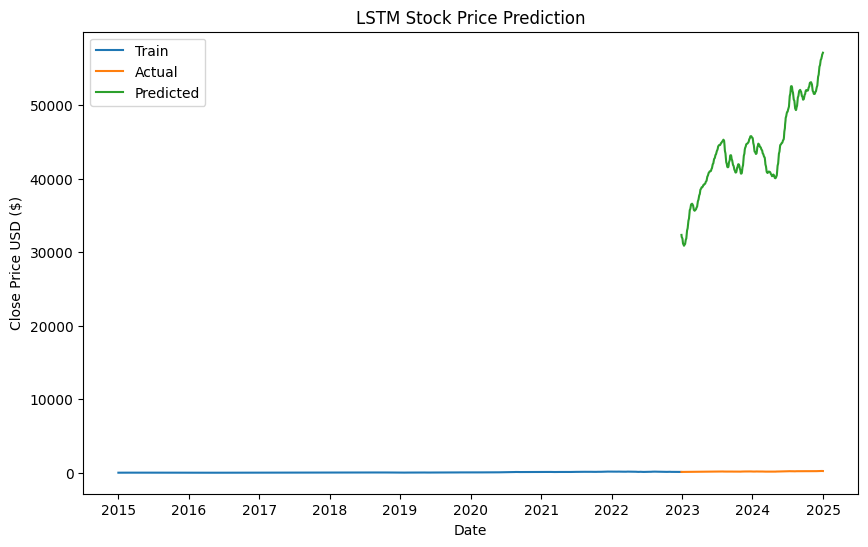

In [31]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(10,6))
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'], label='Train Data')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'])
plt.show()